<img src=images/film3.jpg width = "1500" height = "4000">

# Its Movie Time!!

#### _By: Sarah, Brendan and Ben_

- - -

## Project Overview

One of the most important in steps in any movie making is pre-production. These stage includes all the 




- note to group: if there is time midweek we will look into what studios did the best
- note to group: the numbers data is NOT adjusted for inflation 

**ASK JELLY/JULIAN FOR DATA DICTIONARY: HOW DOES THE NUMBERS CALCULATE WORLDWIDE? ALSO, SOME MOVIE STUDIOS ARE NOT LOCATED IN THE US, WHAT DOES DOMESTIC MEAN BY THAT?




In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!ls Data

README 2.md im.db.zip 


In [4]:
# Reading all the datasets that will be used for the project
tn_df = pd.read_csv('./tn.movie_budgets.csv.gz')
tn_df = tn_df.rename(columns = {'title': 'movie'})
database = "./im.db"
connection = sql.connect(database)

In [5]:
# connecting sqlite3 cursor
query = ''' SELECT * FROM movie_basics'''
sql_df = pd.read_sql_query(query, connection)
sql_df = sql_df.rename(columns = {'primary_title': 'movie'})

### Data Cleaning And Preparation.

In [6]:
# Starting cleaning the tn_df file by removing all the comma's and $ and make them integers which would be much
# much easier for data manipulation
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
tn_df['production_budget'] = tn_df['production_budget'].str[1:]
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').astype(np.int64)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str[1:]
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '').astype(np.int64)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str[1:]
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').astype(np.int64)

In [8]:
# Now we start filtering our data for movies production budget under $5,000.000
prod_budget = tn_df[tn_df.production_budget < 5000000].index
tn_df.drop(prod_budget, inplace = True)
ww_gross = tn_df[tn_df.worldwide_gross < 5000000].index
tn_df.drop(ww_gross, inplace = True)

tn_df.set_index('movie')

#note to group: we will not filter for the production budget, we will look at all movies 
#note to ben: beautiful filtering!!! thank you so much <3 

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747
...,...,...,...,...,...
Rabbit Hole,52,"Dec 17, 2010",5000000,2229058,6205034
Paterson,54,"Dec 28, 2016",5000000,2141423,10727536
The Machinist,57,"Oct 22, 2004",5000000,1082044,8655397


In [9]:
# We will now starting on creating our master dataset by combining both datasets
master_data = tn_df.merge(sql_df, on = 'movie').drop\
(columns = ['original_title', 'start_year', 'id'])

In [10]:
# We will be removing any duplicates from our dataset
master_data = master_data.drop_duplicates(subset  = 'movie').set_index('movie_id')
master_data.tail(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres
movie_id,,,,,,,
tt1082807,"Mar 17, 2017",The Belko Experiment,5000000,10166820,11792942,89.0,"Horror,Thriller"
tt3444696,"Mar 11, 2016",The Perfect Match,5000000,9669521,10182050,87.0,"Biography,Documentary,Family"
tt5124556,"Apr 27, 2001",The Forsaken,5000000,6755271,6755271,86.0,"Drama,Horror,Thriller"
tt8632862,"Sep 21, 2018",Fahrenheit 11/9,5000000,6352306,6653715,128.0,Documentary
tt1529567,"May 28, 2010",Sea Rex 3D: Journey to a Prehistoric World,5000000,6096582,16515203,41.0,Documentary
tt3216348,"Dec 2, 2016",Incarnate,5000000,4799774,9371036,91.0,"Horror,Thriller"
tt3566920,"Mar 4, 2016",The Other Side of the Door,5000000,3000342,12905107,90.0,Drama
tt1216491,"Oct 10, 2014",Kill the Messenger,5000000,2450846,6656705,112.0,"Biography,Crime,Drama"
tt0935075,"Dec 17, 2010",Rabbit Hole,5000000,2229058,6205034,91.0,Drama


In [11]:
# We will create a new column for movies released month to help with manipulation of our data
master_data['release_month'] = master_data['release_date'].str[:3]


In [12]:
# The next step is to drop all the NaN and get our data ready for analysis
master_data.dropna(inplace = True)

In [13]:
#creating two ROIs columns: worldwide ROI & domestic ROI
master_data['domestic_ROI_perc'] = (master_data['domestic_gross'] - master_data['production_budget']) / master_data['production_budget'] * 100

master_data['worldwide_ROI_perc'] =(master_data['worldwide_gross'] - master_data['production_budget']) / master_data['production_budget'] * 100

In [14]:
master_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,release_month,domestic_ROI_perc,worldwide_ROI_perc
movie_id,,,,,,,,,,
tt1775309,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,93.0,Horror,Dec,78.942971,553.257713
tt1298650,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",May,-41.289850,154.667286
tt6565702,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,113.0,"Action,Adventure,Sci-Fi",Jun,-87.782186,-57.210757
tt2395427,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",May,38.840250,324.384139
tt4154756,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",Apr,126.271827,582.711400


### Figure 1A: Domestic ROI in Percentage by Release Month

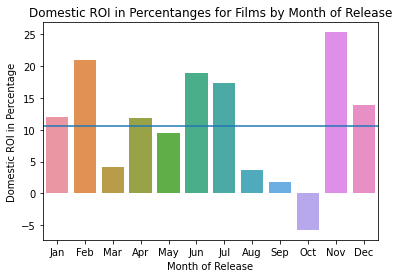

In [15]:
#GRAPH 1: DOMESTIC ROI BY RELEASE MONTH --> PUT MEDIAN ESTIMATOR IN VIA POWER POINT
#risk tolerances, the typical feb month
#if we group eveythhing in this month, the average ROI is this (top of the bar) --> seaborn uses mean by default --> i put it as median
#the horizontal line shows the median domestic ROI for all films in the data set

from numpy import median
fig, ax = plt.subplots()
#setting x and y variables
y1 = master_data['domestic_ROI_perc']
x1 = master_data['release_month']
#graphing variables
ax = sns.barplot(x=x1, y=y1, data=master_data,ci=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], estimator=median)
#setting lables and titles and y-axis range
ax.set_title("Domestic ROI in Percentanges for Films by Month of Release")
ax.set_ylabel("Domestic ROI in Percentage")
ax.set_xlabel("Month of Release")
#display median
ax.axhline(master_data['domestic_ROI_perc'].median())
#other edits i can do
    #use the mean for the top of the bar --> show the mean all across

### Figure 1B: Worldwide ROI in Percentage by Release Month

In [16]:
#DRAFT OF GRAPH 1

#going to start making graphs showing the relationsships between ROI and release month 

#graph 1: release month & domestic roi
#y = master_data['domestic_ROI_perc']
#x = master_data['release_month']

#fig, ax = plt.subplots()
#ax.bar(x,y)

#quesstionss to investigate: how to make a graph to see negativee values, is doing ROI in percent better or should i do plain numbers 
#possible explanations: from the wiki for the oscars; the oscars are usually held in mid to late february or march --> oscars happen and there is a boost in ticket sales or rental/streaming purchaes
#maybe a lot of new releasess come out in jnaury in time for the osccars and other film awards

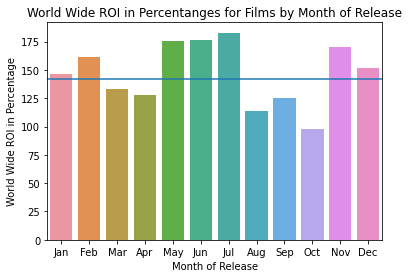

In [17]:
#graph 2: world wide roi and release month
#NOTE: WORLD WIDE ROI INCLUDES DOMESTIC ROI
from numpy import median
fig, ax = plt.subplots()
#setting x and y variables
y2= master_data['worldwide_ROI_perc']
x2 = master_data['release_month']
#graphing variables
ax = sns.barplot(x=x2, y=y2, data=master_data,ci=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], estimator=median)
#setting lables and titles and y-axis range
ax.set_title("World Wide ROI in Percentanges for Films by Month of Release")
ax.set_ylabel("World Wide ROI in Percentage")
ax.set_xlabel("Month of Release")
#display median
ax.axhline(master_data['worldwide_ROI_perc'].median())
#other edits i can do
    #use the mean for the top of the bar --> show the mean all across

In [18]:
#DRAFT: graph 2: release month & worldwide_ROI
#y= master_data['worldwide_ROI_perc']
#x = master_data['release_month']

#fig, ax = plt.subplots()
#ax.bar(x,y)

#intial insights: similar pattern as domestic, esp with that feburary thing --> much greater increase for january (could be holiday season, people want or need something to do bc most things are closed and also awards season )

In [19]:
chart_1 = master_data['runtime_minutes'].to_frame().join(master_data['worldwide_ROI_perc'])

Text(0.5, 0, 'Runtime Minutes')

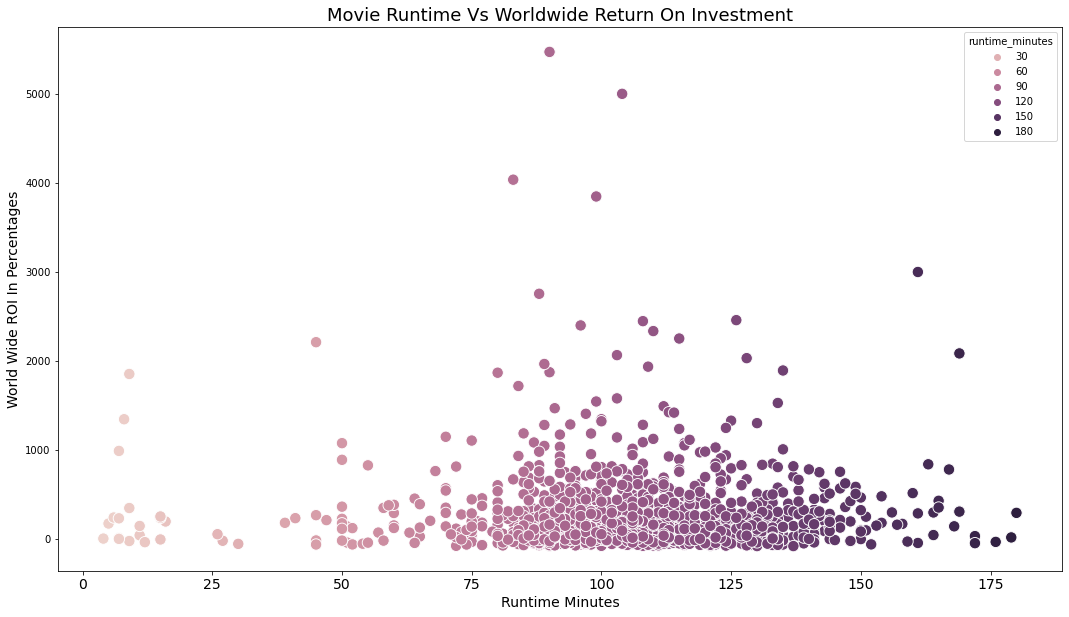

In [20]:
# Visualization of runtime vs worldwide return on investment using Seaborn .
fig, ax = plt.subplots(1,1, figsize = (18, 10))
plt.xticks(fontsize=14, rotation=0)
x_df= chart_1['runtime_minutes']
y_df = chart_1['worldwide_ROI_perc']
ax= sns.scatterplot(x = x_df, y = y_df, data = chart_1, hue = 'runtime_minutes', s = 130)

# Setting titles and adjusting the font size.
ax.set_title("Movie Runtime Vs Worldwide Return On Investment", fontsize = 18)
ax.set_ylabel("World Wide ROI In Percentages", fontsize = 14)
ax.set_xlabel("Runtime Minutes", fontsize = 14)

In [21]:
# As showing in our chart above, movies between 80 - 135 minutes of runtime to generate more revenue worldwide

In [22]:
# The average movie runtime is around 105.00 with a 141% in ROI
chart_1.describe()

,runtime_minutes,worldwide_ROI_perc
count,1404.000000,1404.000000
mean,105.388177,252.621268
std,22.907939,423.218156
min,4.000000,-84.145437
25%,93.000000,30.296173
50%,105.000000,141.615416
75%,118.000000,312.444087
max,180.000000,5479.296120


In [23]:
chart_2 = master_data['runtime_minutes'].to_frame().join(master_data['domestic_ROI_perc'])

Text(0.5, 0, 'Runtime Minutes')

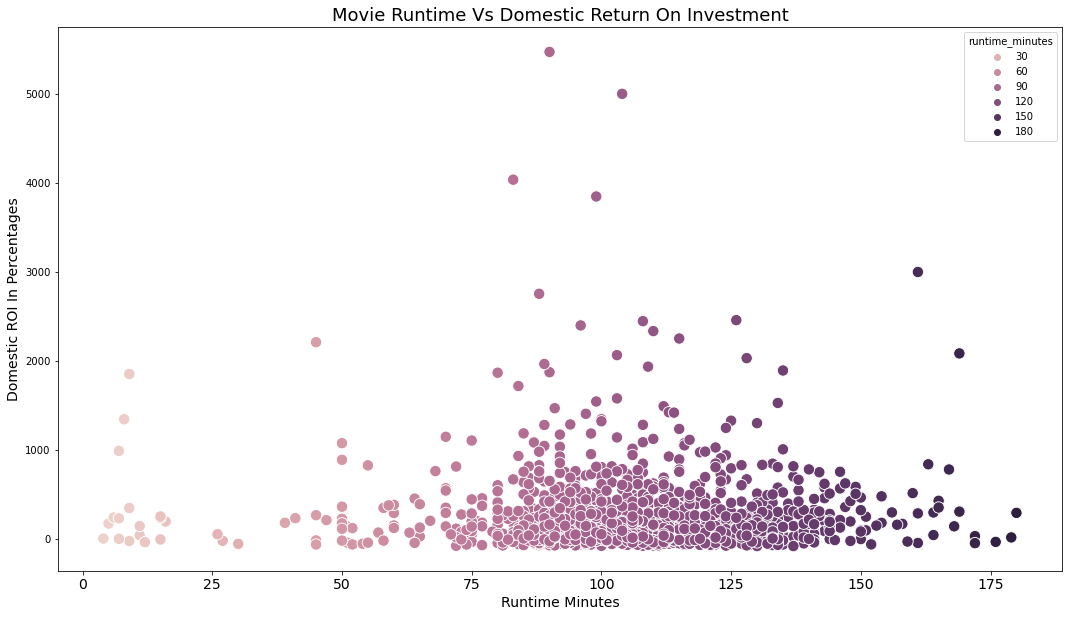

In [24]:
# Visualization of runtime vs worldwide return on investment using Seaborn .
fig, ax = plt.subplots(1,1, figsize = (18, 10))
plt.xticks(fontsize=14, rotation=0)
x_2= chart_2['runtime_minutes']
y_2 = chart_2['domestic_ROI_perc']
ax= sns.scatterplot(x = x_df, y = y_df, data = chart_1, hue = 'runtime_minutes', s = 130)

# Setting titles and adjusting the font size.
ax.set_title("Movie Runtime Vs Domestic Return On Investment", fontsize = 18)
ax.set_ylabel("Domestic ROI In Percentages", fontsize = 14)
ax.set_xlabel("Runtime Minutes", fontsize = 14)

In [25]:
# Most of the movies are between 80 - 130 minutes.
# Domestic median ROI is about 10.6% compared to worldwide which is around 141% in ROI

In [26]:
chart_2.describe()

,runtime_minutes,domestic_ROI_perc
count,1404.000000,1404.000000
mean,105.388177,73.235683
std,22.907939,219.885710
min,4.000000,-100.000000
25%,93.000000,-41.862594
50%,105.000000,10.658142
75%,118.000000,111.569055
max,180.000000,3420.813300


In [27]:
master_data = master_data.drop_duplicates(subset  = 'movie').set_index('movie')

In [28]:
genre = master_data['genres'].to_frame().join(master_data['worldwide_ROI_perc'])
genre

,genres,worldwide_ROI_perc
movie,,
Avatar,Horror,553.257713
Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",154.667286
Dark Phoenix,"Action,Adventure,Sci-Fi",-57.210757
Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",324.384139
Avengers: Infinity War,"Action,Adventure,Sci-Fi",582.711400
...,...,...
Incarnate,"Horror,Thriller",87.420720
The Other Side of the Door,Drama,158.102140
Kill the Messenger,"Biography,Crime,Drama",33.134100


In [29]:
Action = genre[(genre.genres.str.contains('Action'))]
Action['worldwide_ROI_perc'].median()

137.54252499999998

In [30]:
Action['worldwide_ROI_perc'].describe()

count     407.000000
mean      206.096048
std       276.502189
min       -84.145437
25%        32.533594
50%       137.542525
75%       293.984455
max      3001.627558
Name: worldwide_ROI_perc, dtype: float64

In [31]:
Action = genre[(genre.genres.str.contains('Action'))]
Adventure = genre[(genre.genres.str.contains('Adventure'))]
Animation = genre[(genre.genres.str.contains('Animation'))]
Biography = genre[(genre.genres.str.contains('Biography'))]
Comedy = genre[(genre.genres.str.contains('Comedy'))]
Crime = genre[(genre.genres.str.contains('Crime'))]
Drama = genre[(genre.genres.str.contains('Drama'))]
Fantasy = genre[(genre.genres.str.contains('Fantasy'))]
Horror = genre[(genre.genres.str.contains('Horror'))]
Mystery = genre[(genre.genres.str.contains('Mystery'))]
Music = genre[(genre.genres.str.contains('Music'))]
Musical = genre[(genre.genres.str.contains('Musical'))]
Romance = genre[(genre.genres.str.contains('Romance'))]
SciFi = genre[(genre.genres.str.contains('Sci-Fi'))]
Thriller = genre[(genre.genres.str.contains('Thriller'))]
War = genre[(genre.genres.str.contains('War'))]

In [32]:
genre_dfs = [Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Fantasy, Horror, Mystery, Music, Musical, Romance, SciFi, Thriller, War]

In [33]:
combined_genres = pd.concat(genre_dfs)

In [34]:
Action_median = Action['worldwide_ROI_perc'].median()
Adventure_median = Adventure['worldwide_ROI_perc'].median()
Animation_median = Animation['worldwide_ROI_perc'].median()
Biography_median = Biography['worldwide_ROI_perc'].median()
Comedy_median = Comedy['worldwide_ROI_perc'].median()
Crime_median = Crime['worldwide_ROI_perc'].median()
Drama_median = Drama['worldwide_ROI_perc'].median()
Fantasy_median = Fantasy['worldwide_ROI_perc'].median()
Horror_median = Horror['worldwide_ROI_perc'].median()
Music_median = Music['worldwide_ROI_perc'].median()
Musical_median = Musical['worldwide_ROI_perc'].median()
Mystery_median = Mystery['worldwide_ROI_perc'].median()
Romance_median = Romance['worldwide_ROI_perc'].median()
SciFi_median = SciFi['worldwide_ROI_perc'].median()
Thriller_median = Thriller['worldwide_ROI_perc'].median()
War_median = War['worldwide_ROI_perc'].median()

In [35]:
genre_df_medians = pd.DataFrame([['Action', Action_median], ['Adventure', Adventure_median], ['Animation', Animation_median], ['Biography', Biography_median], ['Comedy', Comedy_median], ['Crime', Crime_median], ['Drama', Drama_median], ['Fantasy', Fantasy_median], ['Horror', Horror_median], ['Music', Music_median], ['Musical', Musical_median], ['Mystery', Mystery_median], ['Romance', Romance_median], ['SciFi', SciFi_median], ['Thriller', Thriller_median], ['War', War_median]], columns=['genre', 'worldwide_ROI_perc'])

In [36]:
top5_genre_ROI = genre_df_medians.sort_values(by='worldwide_ROI_perc',ascending=False).head()

Text(0.5, 0, 'Genre')

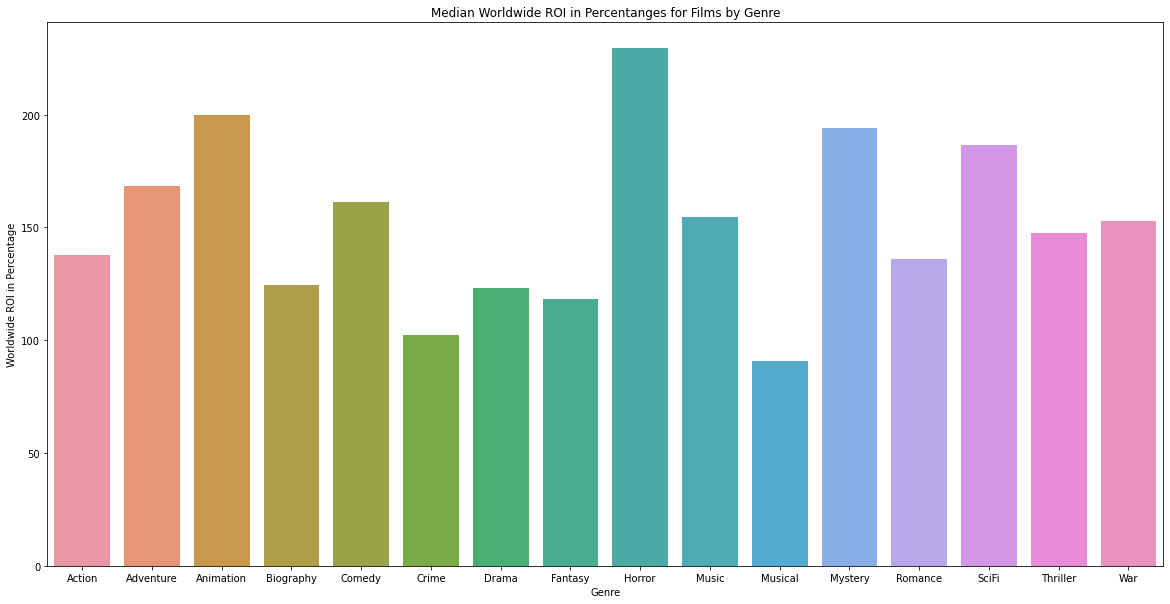

In [37]:
#graph 1: relationship between worldwide ROI and genre 
fig, ax = plt.subplots(figsize=(20, 10))


#setting x and y variables 
y1 = genre_df_medians['worldwide_ROI_perc']
x1 = genre_df_medians['genre']


#graphing variables
ax = sns.barplot(x=x1, y=y1, data=genre_df_medians)


#setting lables and titles
ax.set_title("Median Worldwide ROI in Percentanges for Films by Genre")
ax.set_ylabel("Worldwide ROI in Percentage")
ax.set_xlabel("Genre")

#Notes: The genres Fantasy, Music, Musical, Mystery, and War all have sample sizes lower than 5 and should be discounted.
#Notes: There are some overlaps between the genres because some movies had multiple genre classifications such as Crime/Drama.
#Notes: Action, Comedy, Drama, Adventure, and Biography had the largest value counts with 407, 246, 245, 159, and 114, respectively.
#Notes: Highest Worldwide ROI in descending order was Horror, Animation, SciFi, Mystery, and Adventure with 218.56, 199.62, 195.06, 194.13, and 169.09, respectively


#we can also use median as the estimator by doing this:
#from numpy import median
#y = master_data['domestic_ROI_perc']
#x = master_data['release_month']

#ax = sns.barplot(x=x, y=y, data=genre_df_medians, estimator=median).set(title="Median Worldwide ROI in Percentanges for Films by Genre")

#ax.set_xlabel("Genre")
#ax.set_ylabel("Worldwide ROI in Percentages")

Text(0.5, 0, 'Genre')

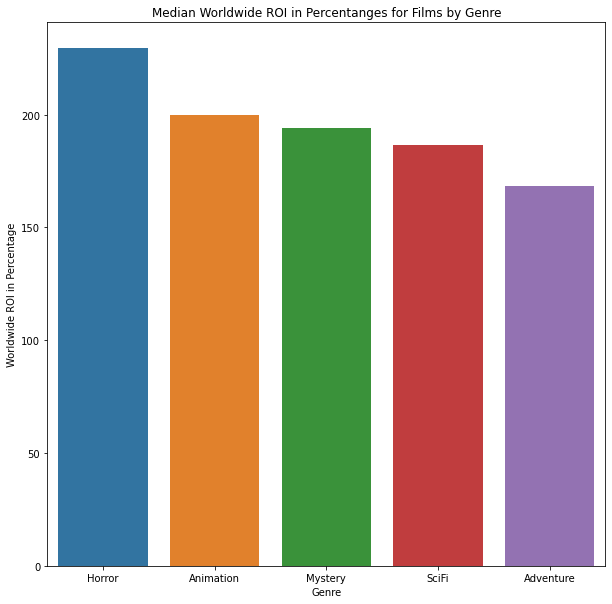

In [38]:
#graph 1: Highest worldwide ROI by genre 
fig, ax = plt.subplots(figsize=(10, 10))


#setting x and y variables 
y1 = top5_genre_ROI['worldwide_ROI_perc']
x1 = top5_genre_ROI['genre']


#graphing variables
ax = sns.barplot(x=x1, y=y1, data=top5_genre_ROI)


#setting lables and titles
ax.set_title("Median Worldwide ROI in Percentanges for Films by Genre")
ax.set_ylabel("Worldwide ROI in Percentage")
ax.set_xlabel("Genre")

#Notes: The genres Fantasy, Music, Musical, Mystery, and War all have sample sizes lower than 5 and should be discounted.
#Notes: There are some overlaps between the genres because some movies had multiple genre classifications such as Crime/Drama.
#Notes: Action, Comedy, Drama, Adventure, and Biography had the largest value counts with 407, 246, 245, 159, and 114, respectively.
#Notes: Highest Worldwide ROI in descending order was Horror, Animation, SciFi, Mystery, and Adventure with 218.56, 199.62, 195.06, 194.13, and 169.09, respectively


#we can also use median as the estimator by doing this:
#from numpy import median
#y = master_data['domestic_ROI_perc']
#x = master_data['release_month']

#ax = sns.barplot(x=x, y=y, data=genre_df_medians, estimator=median).set(title="Median Worldwide ROI in Percentanges for Films by Genre")

#ax.set_xlabel("Genre")
#ax.set_ylabel("Worldwide ROI in Percentages")